In [1]:
import pandas as pd

meta_df = pd.read_csv(r"C:\Users\prane\Downloads\archive\cleaned_dataset\metadata.csv")
print(meta_df.head())  # View the first few rows
print(meta_df.columns)  # List column names

        type                                         start_time  \
0  discharge  [2010.       7.      21.      15.       0.    ...   
1  impedance  [2010.       7.      21.      16.      53.    ...   
2     charge  [2010.       7.      21.      17.      25.    ...   
3  impedance                    [2010    7   21   20   31    5]   
4  discharge  [2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...   

   ambient_temperature battery_id  test_id  uid   filename  \
0                    4      B0047        0    1  00001.csv   
1                   24      B0047        1    2  00002.csv   
2                    4      B0047        2    3  00003.csv   
3                   24      B0047        3    4  00004.csv   
4                    4      B0047        4    5  00005.csv   

             Capacity                   Re                  Rct  
0  1.6743047446975208                  NaN                  NaN  
1                 NaN  0.05605783343888099  0.20097016584458333  
2                 NaN     

In [2]:
import os

data_path = r"C:\Users\prane\Downloads\archive\cleaned_dataset\data"
sample_file = r"C:\Users\prane\Downloads\archive\cleaned_dataset\data\00824.csv"
df = pd.read_csv(sample_file)
print(df.head())  # Check first few rows
print(df.columns)  # Check column names

                             Sense_current  \
0   (859.8280639648438-37.47503662109375j)   
1   (852.5401000976562-47.97996520996094j)   
2   (851.8009643554688-55.66655349731445j)   
3  (853.9559326171875-60.988494873046875j)   
4   (851.2561645507812-60.48695373535156j)   

                            Battery_current  \
0      (298.73779296875-81.81706237792969j)   
1    (307.0118408203125-70.52193450927734j)   
2    (306.2786865234375-62.37811279296875j)   
3   (305.7457275390625-57.508384704589844j)   
4  (306.69305419921875-49.572425842285156j)   

                              Current_ratio  \
0  (2.7093374994709865+0.6165774900641916j)   
1  (2.6718187818546557+0.4574477113631846j)   
2  (2.705907670546972+0.36934617183937585j)   
3  (2.733826979535041+0.31473695333828255j)   
4  (2.735994196316076+0.24501016451986252j)   

                            Battery_impedance  \
0  (0.16267025874745614-0.12583198832767659j)   
1   (0.1889329946605099-0.10532285887688338j)   
2    (0.20

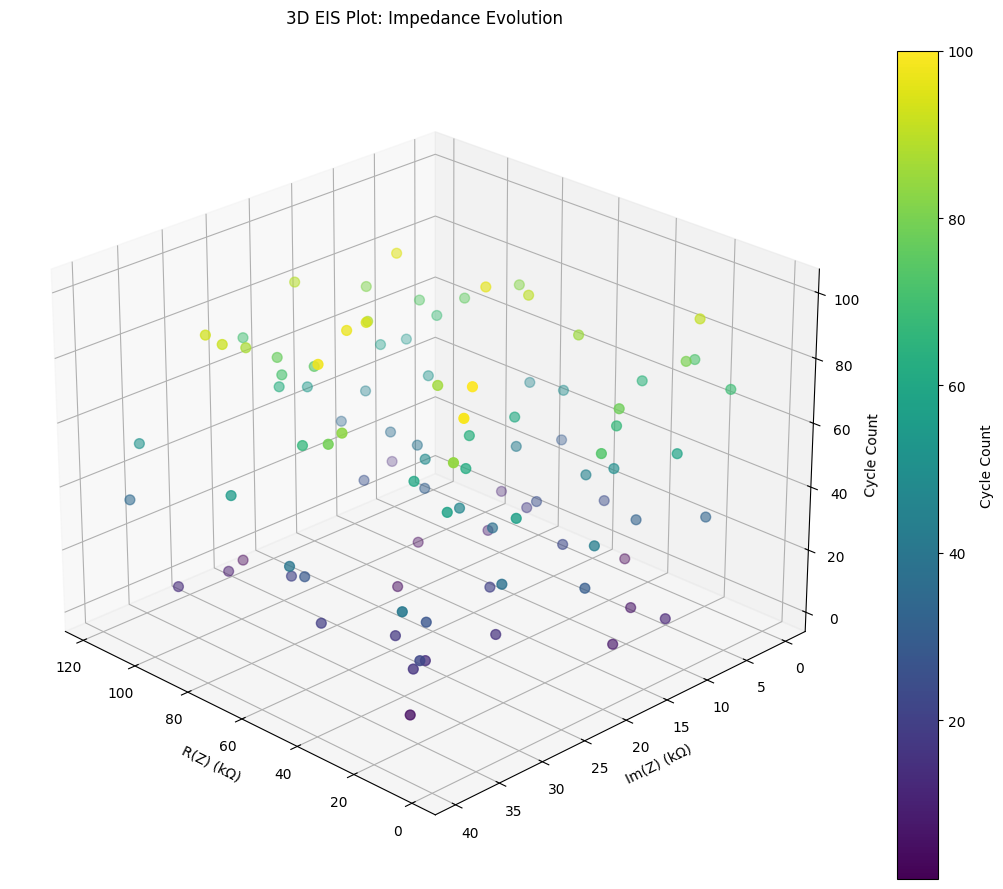

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Simulate EIS data
np.random.seed(42)
cycle_count = np.arange(1, 101)
real_impedance = np.random.uniform(0, 120, 100)
imag_impedance = np.random.uniform(0, 40, 100)

# Create DataFrame
df = pd.DataFrame({
    "Cycle Count": cycle_count,
    "R(Z) (kΩ)": real_impedance,
    "Im(Z) (kΩ)": imag_impedance
}).sort_values('Cycle Count')

# Create 3D Plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapping to Cycle Count
scatter = ax.scatter(df['R(Z) (kΩ)'], df['Im(Z) (kΩ)'], df['Cycle Count'],
                     c=df['Cycle Count'], cmap='viridis', s=50)

# Axis labels and title
ax.set_xlabel('R(Z) (kΩ)')
ax.set_ylabel('Im(Z) (kΩ)')
ax.set_zlabel('Cycle Count')
ax.set_title('3D EIS Plot: Impedance Evolution', pad=20)

# Centering the graph and adding color bar
ax.view_init(elev=25, azim=135)
plt.colorbar(scatter, ax=ax, label='Cycle Count')

# Improve layout and display
plt.tight_layout()
plt.show()

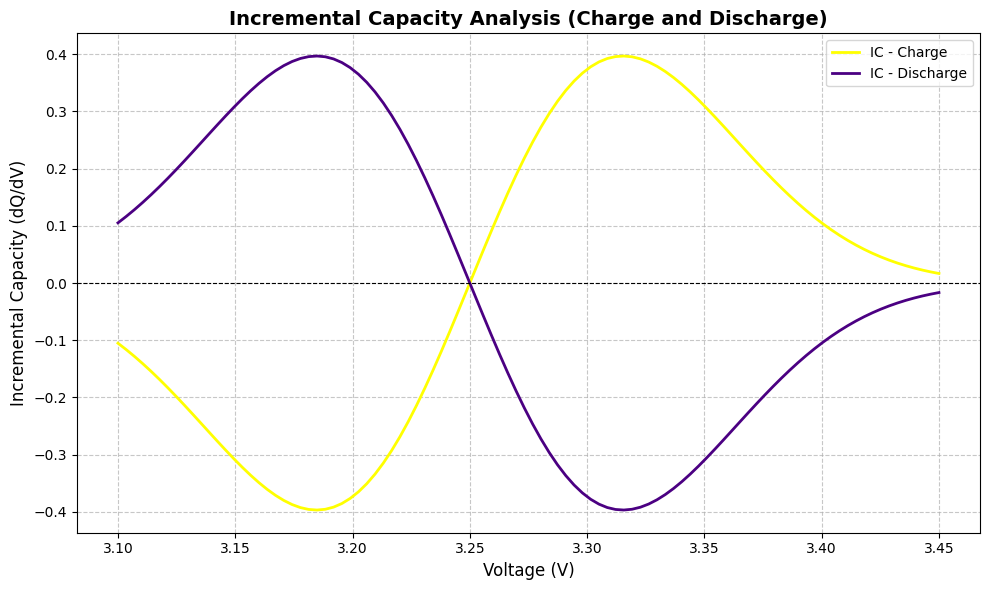

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate voltage range for charge and discharge
voltage_charge = np.linspace(3.1, 3.45, 100)
voltage_discharge = np.linspace(3.1, 3.45, 100)

# Simulate Incremental Capacity (dQ/dV) using sinusoidal and Gaussian components
dq_dv_charge = np.sin(10 * (voltage_charge - 3.25)) * np.exp(-(voltage_charge - 3.25)**2 / 0.01)
dq_dv_discharge = -np.sin(10 * (voltage_discharge - 3.25)) * np.exp(-(voltage_discharge - 3.25)**2 / 0.01)

# 2D Incremental Capacity Analysis (ICA) Plot
plt.figure(figsize=(10, 6))
plt.plot(voltage_charge, dq_dv_charge, label="IC - Charge", color='yellow', linewidth=2)
plt.plot(voltage_discharge, dq_dv_discharge, label="IC - Discharge", color='indigo', linewidth=2)
plt.xlabel("Voltage (V)", fontsize=12)
plt.ylabel("Incremental Capacity (dQ/dV)", fontsize=12)
plt.title("Incremental Capacity Analysis (Charge and Discharge)", fontsize=14, weight='bold')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at y=0
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

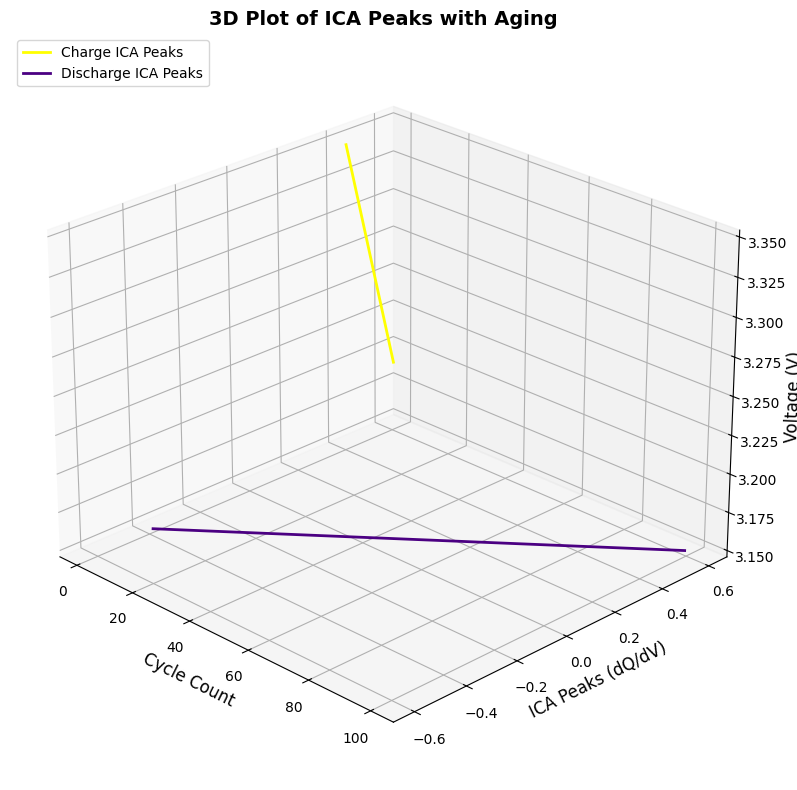

In [5]:
# Simulate aging effects on ICA peaks
cycle_count = np.arange(1, 101)  # 100 cycles
ica_peaks_charge = [np.max(dq_dv_charge) - (i * 0.01) for i in range(100)]  # Gradual peak decrease
ica_peaks_discharge = [np.min(dq_dv_discharge) + (i * 0.01) for i in range(100)]  # Gradual peak increase

# 3D Plot of ICA Peaks vs. Aging
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting charge and discharge peaks over cycles
ax.plot(cycle_count, ica_peaks_charge, zs=3.35, zdir='z', label="Charge ICA Peaks", color='yellow', linewidth=2)
ax.plot(cycle_count, ica_peaks_discharge, zs=3.15, zdir='z', label="Discharge ICA Peaks", color='indigo', linewidth=2)

# 3D plot customization
ax.set_xlabel("Cycle Count", fontsize=12)
ax.set_ylabel("ICA Peaks (dQ/dV)", fontsize=12)
ax.set_zlabel("Voltage (V)", fontsize=12)
ax.set_title("3D Plot of ICA Peaks with Aging", fontsize=14, weight='bold')
ax.view_init(elev=25, azim=-45)  # Adjust viewing angle
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=10, loc='upper left')
plt.tight_layout()
plt.show()

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
MSE: 1.6801
MAE: 1.0130
R² Score: 0.7275


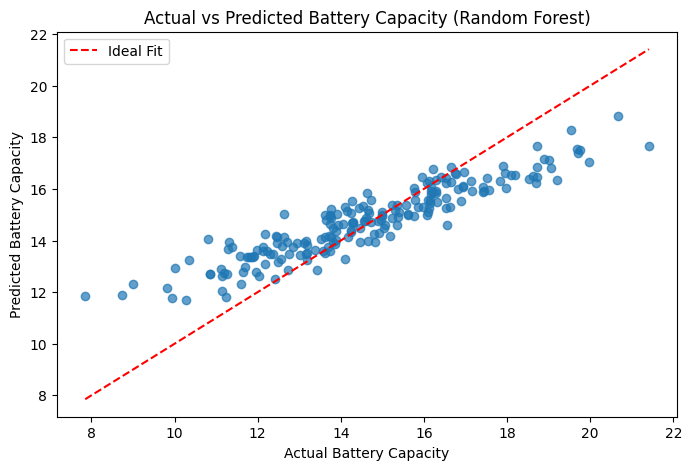

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Simulating EIS signature data (Modify this part based on real data)
np.random.seed(42)
num_samples = 1000
num_features = 10  # Example: Impedance at different frequencies

# Simulated EIS signature features (Modify based on actual dataset)
X = np.random.rand(num_samples, num_features)

# Simulated battery capacity (Modify based on real target variable)
y = 3 * np.sum(X, axis=1) + np.random.randn(num_samples) * 0.3  # Adding noise

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (Random Forest does not require scaling, but improves performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Model
rf = RandomForestRegressor(random_state=42)

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of decision trees
    'max_depth': [None, 10, 20],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples per leaf
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model from GridSearch
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Plotting Actual vs Predicted Battery Capacity
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit")
plt.xlabel('Actual Battery Capacity')
plt.ylabel('Predicted Battery Capacity')
plt.title('Actual vs Predicted Battery Capacity (Random Forest)')
plt.legend()
plt.show()
